In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
input_path = r"data/staySpain_cleaned.pkl"
df = pd.read_pickle(input_path)

## PREGUNTA NEGOCI

### preu mitjà per tipus d'allotjament a cada ciutat

In [3]:
df = pd.read_pickle(input_path)

In [4]:
# Create crosstab with mean price
mean_price_per_room_type_and_city = pd.crosstab(index=df['city'], columns=df['room_type'], values=df['price'], aggfunc='mean')
mean_price_per_room_type_and_city = round(mean_price_per_room_type_and_city, 2)

# Display the crosstab
display(mean_price_per_room_type_and_city)

room_type,Entire home/apt,Hotel room,Private room,Shared room
city,,,,
barcelona,1300.94,1444.29,455.05,371.88
girona,1230.68,625.00,602.12,NaN
madrid,942.63,902.50,372.81,313.33
malaga,815.78,703.33,356.73,143.33
mallorca,1709.57,1401.67,700.25,493.33
menorca,1656.53,NaN,610.00,NaN
sevilla,1033.91,918.57,606.00,120.00
valencia,796.62,955.00,340.15,203.33


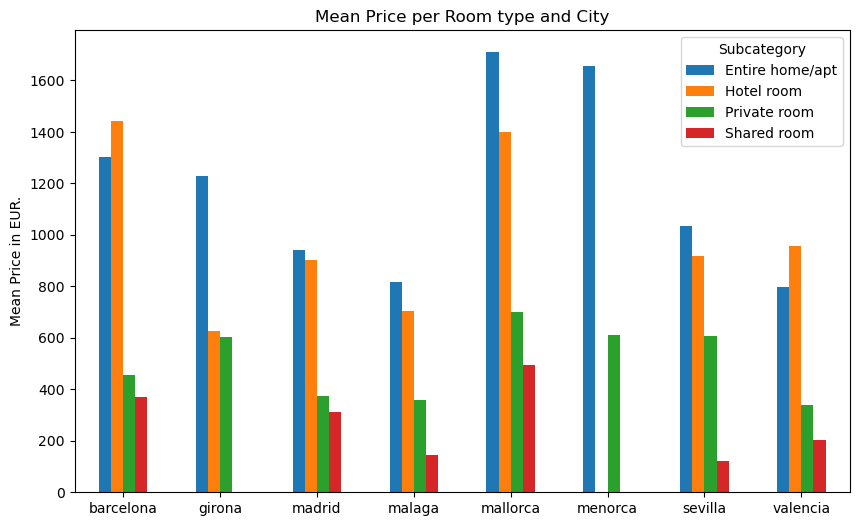

In [5]:
# Plot the grouped bar chart
mean_price_per_room_type_and_city.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Price per Room type and City')
plt.xlabel(None)
plt.ylabel('Mean Price in EUR.')
plt.xticks(rotation=0)
plt.legend(title='Subcategory')
plt.show()

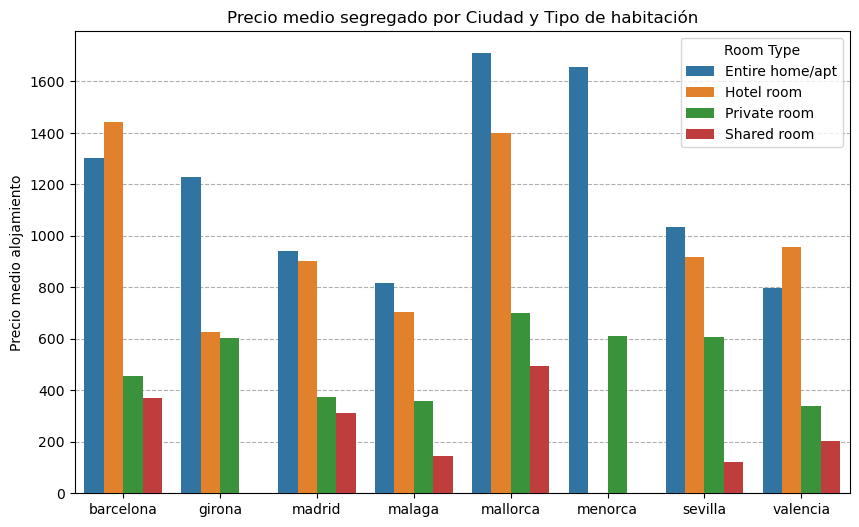

In [6]:
# Reset the index to convert crosstab to long-form DataFrame
crosstab_reset = mean_price_per_room_type_and_city.reset_index()

# Melt the DataFrame to long format
crosstab_long = crosstab_reset.melt(id_vars='city', var_name='room_type', value_name='mean_price')

# Plot with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=crosstab_long, x='city', y='mean_price', hue='room_type', zorder=3)
plt.title('Precio medio segregado por Ciudad y Tipo de habitación')
plt.xlabel(None)
plt.ylabel('Precio medio alojamiento')
plt.legend(title='Room Type')
plt.xticks(rotation=0)
plt.grid(axis='y', zorder=0, linestyle="--")
plt.savefig('D1 - Precio medio segregado por Ciudad y Tipo de habitación', format='png', dpi=300)  # Save as PNG with 300 DPI
plt.show()

### Teniendo en cuenta el precio por persona (precio por accommodate)

In [7]:
df = pd.read_pickle(input_path)

In [8]:
df = df[['apartment_id','price','accommodates','city','room_type']]
df['price_per_person'] = df['price'] / df['accommodates']
df.head()

,apartment_id,price,accommodates,city,room_type,price_per_person
0,11964,400.0,2,malaga,Private room,200.0
1,21853,170.0,1,madrid,Private room,170.0
2,32347,990.0,4,sevilla,Entire home/apt,247.5
3,35379,400.0,2,barcelona,Private room,200.0
4,35801,900.0,5,girona,Private room,180.0


In [9]:
# Create crosstab with mean price
mean_price_per_room_type_and_city = pd.crosstab(index=df['city'], columns=df['room_type'], values=df['price_per_person'], aggfunc='mean')
mean_price_per_room_type_and_city = round(mean_price_per_room_type_and_city, 2)

# Display the crosstab
display(mean_price_per_room_type_and_city)

room_type,Entire home/apt,Hotel room,Private room,Shared room
city,,,,
barcelona,287.25,474.17,263.72,197.76
girona,217.11,151.92,244.55,NaN
madrid,241.67,275.00,240.89,197.92
malaga,201.35,351.67,195.24,55.62
mallorca,286.42,593.94,319.38,246.67
menorca,262.28,NaN,241.67,NaN
sevilla,253.88,318.57,312.20,30.00
valencia,179.67,166.88,196.31,101.67


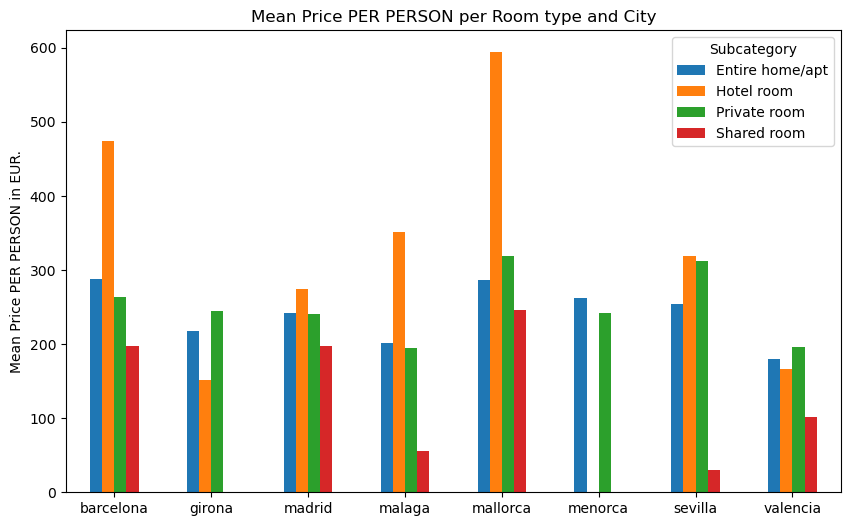

In [10]:
# Plot the grouped bar chart
mean_price_per_room_type_and_city.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Price PER PERSON per Room type and City')
plt.xlabel(None)
plt.ylabel('Mean Price PER PERSON in EUR.')
plt.xticks(rotation=0)
plt.legend(title='Subcategory')
plt.show()

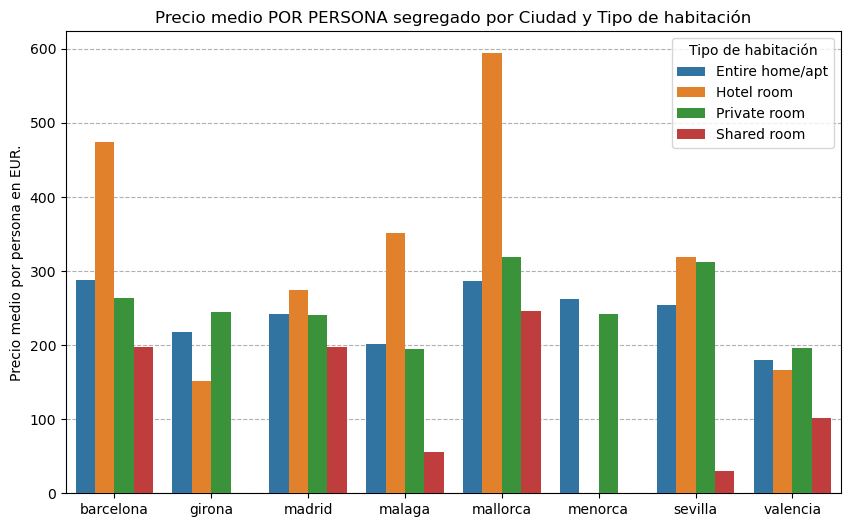

In [11]:
# Reset the index to convert crosstab to long-form DataFrame
crosstab_reset = mean_price_per_room_type_and_city.reset_index()

# Melt the DataFrame to long format
crosstab_long = crosstab_reset.melt(id_vars='city', var_name='room_type', value_name='mean_price')

# Plot with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=crosstab_long, x='city', y='mean_price', hue='room_type', zorder=3)
plt.title('Precio medio POR PERSONA segregado por Ciudad y Tipo de habitación')
plt.xlabel(None)
plt.ylabel('Precio medio por persona en EUR.')
plt.legend(title='Tipo de habitación')
plt.xticks(rotation=0)
plt.grid(axis='y', zorder=0, linestyle="--")
plt.savefig('D2 - Precio medio POR PERSONA segregado por Ciudad y Tipo de habitación', format='png', dpi=300)  # Save as PNG with 300 DPI
plt.show()

---

## Quitando outliers

Considerando outliers aquellos valores a una distancia de la mediana superior al 1.5IQR

Valorando el precio por persona, en lugar del precio absoluto del inmueble

In [12]:
df = pd.read_pickle(input_path)

In [13]:
df = df[['apartment_id','price','accommodates','city','room_type']]
df['price_per_person'] = df['price'] / df['accommodates']
df.head()

,apartment_id,price,accommodates,city,room_type,price_per_person
0,11964,400.0,2,malaga,Private room,200.0
1,21853,170.0,1,madrid,Private room,170.0
2,32347,990.0,4,sevilla,Entire home/apt,247.5
3,35379,400.0,2,barcelona,Private room,200.0
4,35801,900.0,5,girona,Private room,180.0


In [14]:
# Step 1: Calculate Q1 and Q3
Q1 = df['price_per_person'].quantile(0.25)
Q3 = df['price_per_person'].quantile(0.75)

# Step 2: Calculate IQR
IQR = Q3 - Q1

# Step 3: Define the outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 4: Filter the DataFrame to remove outliers
df_no_outliers = df[(df['price_per_person'] >= lower_bound) & (df['price_per_person'] <= upper_bound)]

In [15]:
df.describe()

,apartment_id,price,accommodates,price_per_person
count,6.733000e+03,6612.000000,6733.000000,6612.000000
mean,1.512717e+07,1010.930732,4.346651,252.414698
std,7.729288e+06,846.993444,2.626279,203.803465
min,1.196400e+04,60.000000,1.000000,9.090909
25%,8.699662e+06,450.000000,2.000000,150.000000
50%,1.677280e+07,750.000000,4.000000,204.000000
75%,2.148062e+07,1230.000000,6.000000,300.000000
max,2.724512e+07,6071.000000,29.000000,5000.000000


In [16]:
df_no_outliers.describe()

,apartment_id,price,accommodates,price_per_person
count,6.295000e+03,6295.000000,6295.000000,6295.000000
mean,1.506929e+07,935.126291,4.304051,222.876815
std,7.768985e+06,730.553337,2.507188,101.350485
min,1.196400e+04,60.000000,1.000000,9.090909
25%,8.469420e+06,450.000000,2.000000,150.000000
50%,1.671873e+07,720.000000,4.000000,200.000000
75%,2.147782e+07,1170.000000,6.000000,280.000000
max,2.724512e+07,5000.000000,16.000000,525.000000


In [17]:
df = df_no_outliers

In [18]:
# Create crosstab with mean price
mean_price_per_room_type_and_city = pd.crosstab(index=df['city'], columns=df['room_type'], values=df['price_per_person'], aggfunc='mean')
mean_price_per_room_type_and_city = round(mean_price_per_room_type_and_city, 2)

# Display the crosstab
display(mean_price_per_room_type_and_city)

room_type,Entire home/apt,Hotel room,Private room,Shared room
city,,,,
barcelona,248.55,340.83,226.61,197.76
girona,205.07,151.92,220.23,NaN
madrid,221.72,275.00,197.56,172.77
malaga,193.31,351.67,185.90,55.62
mallorca,257.17,388.50,262.65,246.67
menorca,249.18,NaN,241.67,NaN
sevilla,210.53,246.67,181.63,30.00
valencia,168.05,166.88,169.21,101.67


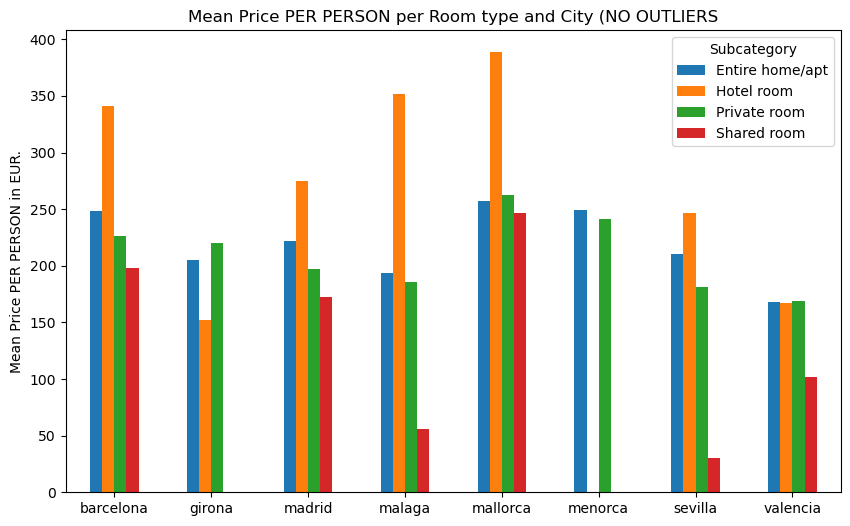

In [19]:
# Plot the grouped bar chart
mean_price_per_room_type_and_city.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Price PER PERSON per Room type and City (NO OUTLIERS')
plt.xlabel(None)
plt.ylabel('Mean Price PER PERSON in EUR.')
plt.xticks(rotation=0)
plt.legend(title='Subcategory')
plt.show()

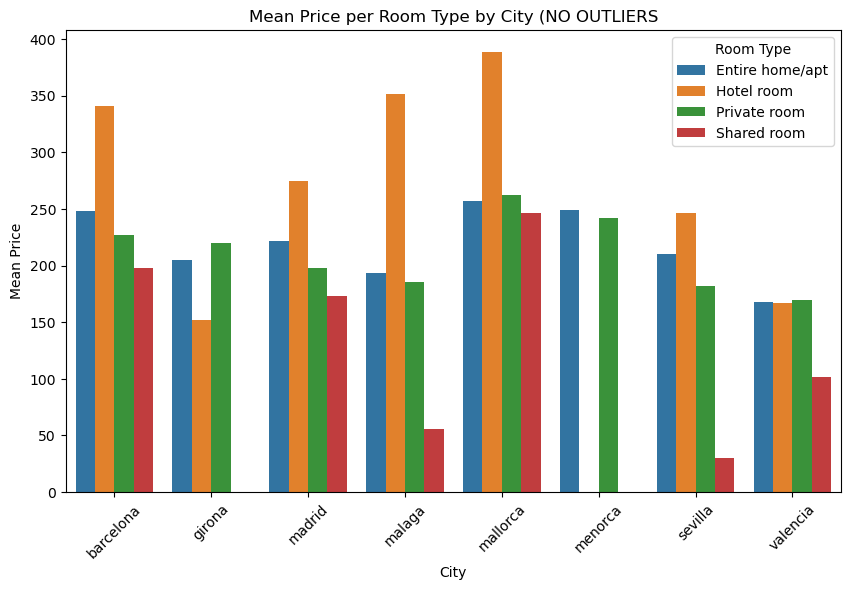

In [20]:
# Reset the index to convert crosstab to long-form DataFrame
crosstab_reset = mean_price_per_room_type_and_city.reset_index()

# Melt the DataFrame to long format
crosstab_long = crosstab_reset.melt(id_vars='city', var_name='room_type', value_name='mean_price')

# Plot with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=crosstab_long, x='city', y='mean_price', hue='room_type')
plt.title('Mean Price per Room Type by City (NO OUTLIERS')
plt.xlabel('City')
plt.ylabel('Mean Price')
plt.legend(title='Room Type')
plt.xticks(rotation=45)
plt.show()

---

## Análisis de Outliers (outliers_df)

In [21]:
df = pd.read_pickle(input_path)

In [22]:
df = df[['apartment_id','price','accommodates','city','room_type']]
df['price_per_person'] = df['price'] / df['accommodates']
df.head()

,apartment_id,price,accommodates,city,room_type,price_per_person
0,11964,400.0,2,malaga,Private room,200.0
1,21853,170.0,1,madrid,Private room,170.0
2,32347,990.0,4,sevilla,Entire home/apt,247.5
3,35379,400.0,2,barcelona,Private room,200.0
4,35801,900.0,5,girona,Private room,180.0


In [23]:
# Step 1: Calculate Q1 and Q3
Q1 = df['price_per_person'].quantile(0.25)
Q3 = df['price_per_person'].quantile(0.75)

# Step 2: Calculate IQR
IQR = Q3 - Q1

# Step 3: Define the outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 4: Create a DataFrame with only the outliers
outliers_df = df[(df['price_per_person'] < lower_bound) | (df['price_per_person'] > upper_bound)]

In [24]:
outliers_df.describe()

,apartment_id,price,accommodates,price_per_person
count,3.170000e+02,317.000000,317.000000,317.000000
mean,1.600371e+07,2516.258675,3.419558,838.979272
std,7.030570e+06,1410.919546,2.185394,549.405203
min,7.160300e+04,550.000000,1.000000,526.666667
25%,1.189732e+07,1300.000000,2.000000,598.750000
50%,1.746159e+07,2200.000000,2.000000,666.666667
75%,2.140136e+07,3610.000000,5.000000,833.333333
max,2.723783e+07,6071.000000,9.000000,5000.000000


NOTA: ver en qué ciudades / room_type están los outliers, como están repartidos

## NULOS

In [25]:
df = pd.read_pickle(input_path)

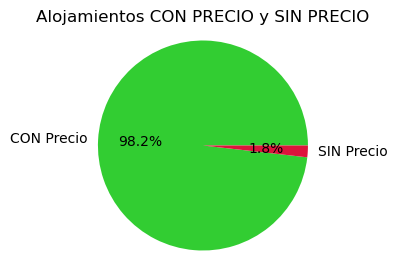

In [26]:
null_counts = df['price'].isnull().value_counts()

# Create a pie chart with specified colors
plt.figure(figsize=(4, 3))
colors = ['limegreen', 'crimson']  # Non-null is limegreen, Null is salmon
plt.pie(null_counts, labels=['CON Precio', 'SIN Precio'], autopct='%1.1f%%', startangle=0, colors=colors)
plt.title('Alojamientos CON PRECIO y SIN PRECIO')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.savefig('D5a - Proporcion precios nulos', format='png', dpi=300)  # Save as PNG with 300 DPI
plt.show()
plt.close()

In [27]:
df['has_price'] = df['price'].notnull()

#### alojamientos por ciudad y room type

In [28]:
# Create crosstab for total counts
crosstab_total = pd.crosstab(df['city'], df['room_type'])
display(crosstab_total)

room_type,Entire home/apt,Hotel room,Private room,Shared room
city,,,,
barcelona,950,7,1066,18
girona,1029,4,52,0
madrid,901,5,475,15
malaga,278,3,55,3
mallorca,1006,7,80,3
menorca,128,0,10,0
sevilla,262,7,71,1
valencia,226,2,66,3


In [29]:
hasprice_city_roomtype_df = df[['apartment_id', 'city', 'has_price', 'room_type']].copy()

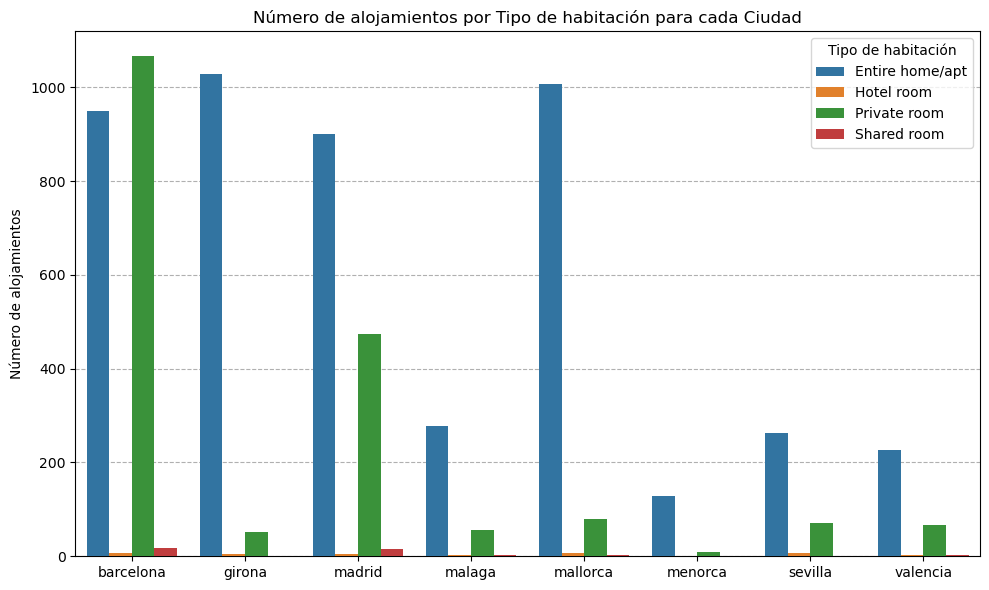

In [30]:
count_data = hasprice_city_roomtype_df.groupby(['city', 'room_type']).size().reset_index(name='count')

# Create the stacked barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=count_data, x='city', y='count', hue='room_type', zorder=3)

# Customize the plot
plt.title('Número de alojamientos por Tipo de habitación para cada Ciudad')
plt.xlabel(None)
plt.ylabel('Número de alojamientos')
plt.legend(title='Tipo de habitación')
plt.xticks(rotation=0)
plt.tight_layout()
plt.grid(zorder=0, axis='y', linestyle='--')
plt.savefig('D3 - Número de alojamientos por ciudad y room type', format='png', dpi=300)  # Save as PNG with 300 DPI

# Show the plot
plt.show()

#### alojamientos SIN PRECIO por ciudad y room type

In [31]:
# Create crosstab for null counts in 'price'
crosstab_nulls = pd.crosstab(df['city'], df['room_type'], values=df['price'].isnull(), aggfunc='sum')
display(crosstab_nulls)

room_type,Entire home/apt,Hotel room,Private room,Shared room
city,,,,
barcelona,21.0,0.0,3.0,2.0
girona,15.0,0.0,0.0,NaN
madrid,8.0,1.0,1.0,0.0
malaga,1.0,0.0,0.0,0.0
mallorca,58.0,1.0,1.0,0.0
menorca,4.0,NaN,0.0,NaN
sevilla,1.0,0.0,1.0,0.0
valencia,2.0,0.0,1.0,0.0


En valores absolutos,
Los nulos están concentrados en
- MALLORCA - Entire home/apt : 58   (5.76%)
- BARCELONA - Entire home/apt : 21  (2.21%)
- GIRONA - Entire home/apt: 15   (1.45%)


In [32]:
nulos_df = df[df.price.isna()]

In [33]:
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

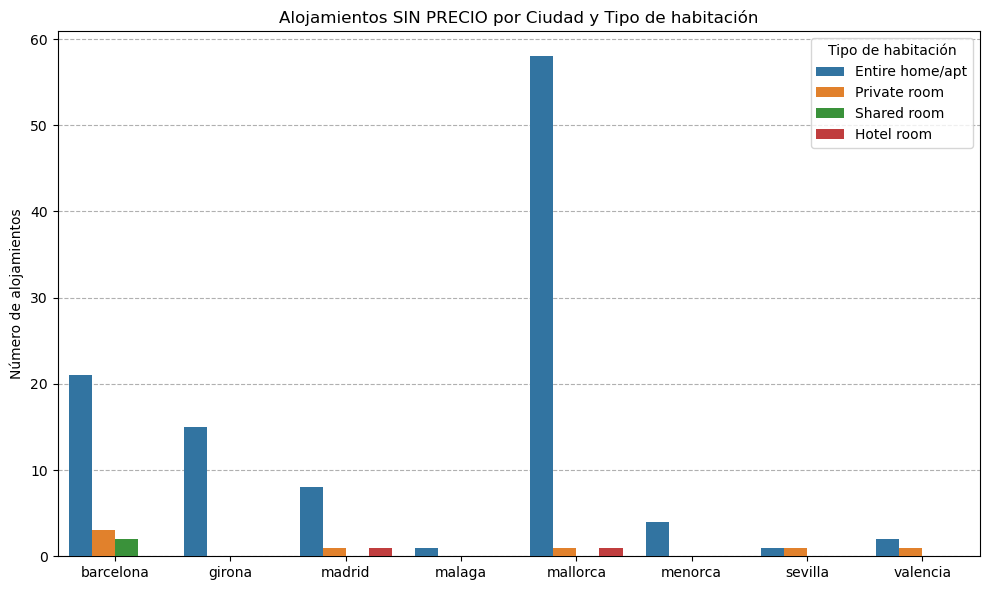

In [34]:
# Group the data by city and room_type, and count the number of registries
grouped_data = nulos_df.groupby(['city', 'room_type']).size().reset_index(name='count')

# Create the grouped bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_data, x='city', y='count', hue='room_type', zorder=3)

# Add titles and labels
plt.title('Alojamientos SIN PRECIO por Ciudad y Tipo de habitación')
plt.grid(axis='y', zorder=0, linestyle='--')
plt.xlabel(None)
plt.ylabel('Número de alojamientos')
plt.legend(title='Tipo de habitación')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('D4 - Alojamientos sin precio segregados', format='png', dpi=300)  # Save as PNG with 300 DPI

# Show the plot
plt.show()

#### porcentaje nulos por ciudad y tipo alojamiento

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6733 entries, 0 to 6999
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   apartment_id                 6733 non-null   int64         
 1   name                         6730 non-null   object        
 2   description                  6706 non-null   object        
 3   host_id                      6733 non-null   int64         
 4   neighbourhood_name           6733 non-null   object        
 5   neighbourhood_district       4075 non-null   object        
 6   room_type                    6733 non-null   object        
 7   accommodates                 6733 non-null   int64         
 8   bathrooms                    6701 non-null   Int64         
 9   bedrooms                     6705 non-null   Int64         
 10  beds                         6730 non-null   float64       
 11  amenities_list               6717 non-null   obj

In [36]:
# Calculate the proportion of nulls
proportion_nulls = crosstab_nulls.div(crosstab_total).fillna(0)
display(proportion_nulls*100) # shows percentage

room_type,Entire home/apt,Hotel room,Private room,Shared room
city,,,,
barcelona,2.210526,0.000000,0.281426,11.111111
girona,1.457726,0.000000,0.000000,0.000000
madrid,0.887902,20.000000,0.210526,0.000000
malaga,0.359712,0.000000,0.000000,0.000000
mallorca,5.765408,14.285714,1.250000,0.000000
menorca,3.125000,0.000000,0.000000,0.000000
sevilla,0.381679,0.000000,1.408451,0.000000
valencia,0.884956,0.000000,1.515152,0.000000


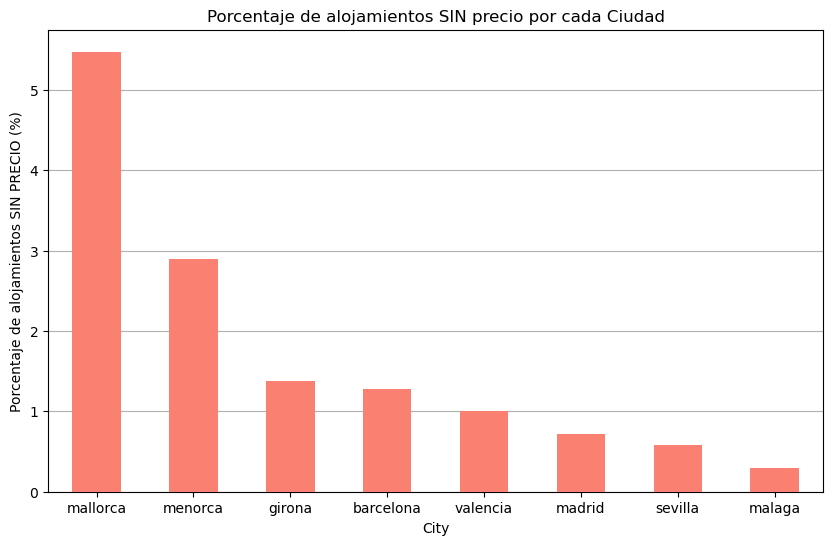

In [37]:
# Calculate the percentage of null values for each city
null_percentage = df.groupby('city')['price'].apply(lambda x: x.isnull().mean() * 100)

# Sort the cities by percentage of null values
null_percentage = null_percentage.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
null_percentage.plot(kind='bar', color='salmon', zorder=3)
plt.title('Porcentaje de alojamientos SIN precio por cada Ciudad')
plt.xlabel('City')
plt.ylabel('Porcentaje de alojamientos SIN PRECIO (%)')
plt.xticks(rotation=0)
plt.grid(axis='y', zorder=0)
plt.savefig('D5b - Porcentaje de alojamientos sin precio', format='png', dpi=300)  # Save as PNG with 300 DPI
plt.show()